# Creating and Backtesting Fibonacci Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11512\1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


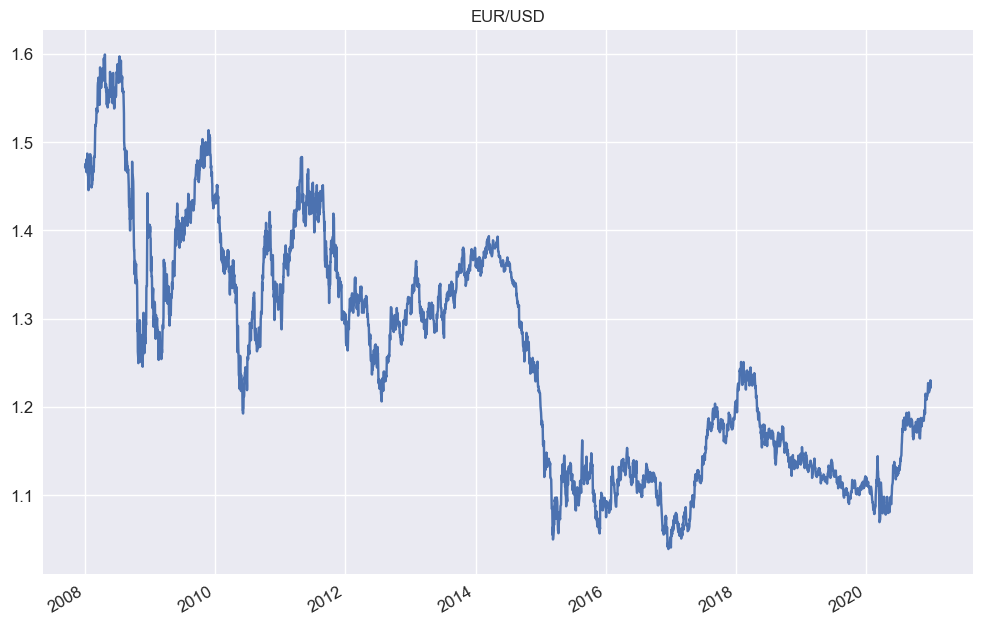

In [4]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## A first Intuition on Fibonacci Retracement (Uptrend)

__Uptrend: Higher Highs and Higher Lows__

In [5]:
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2010-05-01 00:00:00'), Timestamp('2010-05-02 00:00:00'),
       Timestamp('2010-05-03 00:00:00'), Timestamp('2010-05-04 00:00:00'),
       Timestamp('2010-05-05 00:00:00'), Timestamp('2010-05-06 00:00:00'),
       Timestamp('2010-05-07 00:00:00'), Timestamp('2010-05-08 00:00:00'),
       Timestamp('2010-05-09 00:00:00'), Timestamp('2010-05-10 00:00:00'),
       Timestamp('2010-05-11 00:00:00'), Timestamp('2010-05-12 00:00:00'),
       Timestamp('2010-05-13 00:00:00'), Timestamp('2010-05-14 00:00:00'),
       Timestamp('2010-05-15 00:00:00'), Timestamp('2010-05-16 00:00:00'),
       Timestamp('2010-05-17 00:00:00'), Timestamp('2010-05-18 00:00:00'),
       Timestamp('2010-05-19 00:00:00'), Timestamp('2010-05-20 00:00:00'),
       Timestamp('2010-05-21 00:00:00'), Timestamp('2010-05-22 00:00:00'),
       Timestamp('2010-05-23 00:00:00'), Timestamp('2010-05-24 00:00:00'),
       Timestamp('2010-05-25 00:00:00'), Timestamp('2010-05-26 00:00:00'),
       Timestamp('2010-05-27 00:00:00'), Timestamp('2010-05-29 00:00:00'),
       Timestamp('2010-05-30 00:00:00'), Timestamp('2010-05-31 00:00:00'),
       Timestamp('2010-06-01 00:00:00'), Timestamp('2010-06-02 00:00:00'),
       Timestamp('2010-06-03 00:00:00'), Timestamp('2010-06-04 00:00:00'),
       Timestamp('2010-06-05 00:00:00'), Timestamp('2010-06-06 00:00:00'),
       Timestamp('2010-06-07 00:00:00'), Timestamp('2010-06-08 00:00:00'),
       Timestamp('2010-06-09 00:00:00'), Timestamp('2010-06-10 00:00:00'),
       Timestamp('2010-06-11 00:00:00'), Timestamp('2010-06-12 00:00:00'),
       Timestamp('2010-06-13 00:00:00'), Timestamp('2010-06-14 00:00:00'),
       Timestamp('2010-06-15 00:00:00'), Timestamp('2010-06-16 00:00:00'),
       Timestamp('2010-06-17 00:00:00'), Timestamp('2010-06-18 00:00:00'),
       Timestamp('2010-06-19 00:00:00'), Timestamp('2010-06-20 00:00:00'),
       Timestamp('2010-06-21 00:00:00'), Timestamp('2010-06-22 00:00:00'),
       Timestamp('2010-06-23 00:00:00'), Timestamp('2010-06-24 00:00:00'),
       Timestamp('2010-06-26 00:00:00'), Timestamp('2010-06-27 00:00:00'),
       Timestamp('2010-06-28 00:00:00'), Timestamp('2010-06-29 00:00:00'),
       Timestamp('2010-06-30 00:00:00'), Timestamp('2010-07-01 00:00:00'),
       Timestamp('2010-07-03 00:00:00'), Timestamp('2010-07-04 00:00:00'),
       Timestamp('2010-07-05 00:00:00'), Timestamp('2010-07-06 00:00:00'),
       Timestamp('2010-07-07 00:00:00'), Timestamp('2010-07-08 00:00:00'),
       Timestamp('2010-07-09 00:00:00'), Timestamp('2010-07-10 00:00:00'),
       Timestamp('2010-07-11 00:00:00'), Timestamp('2010-07-12 00:00:00'),
       Timestamp('2010-07-13 00:00:00'), Timestamp('2010-07-14 00:00:00'),
       Timestamp('2010-07-15 00:00:00'), Timestamp('2010-07-16 00:00:00'),
       Timestamp('2010-07-17 00:00:00'), Timestamp('2010-07-18 00:00:00'),
       Timestamp('2010-07-19 00:00:00'), Timestamp('2010-07-20 00:00:00'),
       Timestamp('2010-07-21 00:00:00'), Timestamp('2010-07-22 00:00:00'),
       Timestamp('2010-07-23 00:00:00'), Timestamp('2010-07-24 00:00:00'),
       Timestamp('2010-07-25 00:00:00'), Timestamp('2010-07-26 00:00:00'),
       Timestamp('2010-07-27 00:00:00'), Timestamp('2010-07-28 00:00:00'),
       Timestamp('2010-07-29 00:00:00'), Timestamp('2010-07-30 00:00:00'),
       Timestamp('2010-07-31 00:00:00'), Timestamp('2010-08-01 00:00:00'),
       Timestamp('2010-08-02 00:00:00'), Timestamp('2010-08-03 00:00:00'),
       Timestamp('2010-08-04 00:00:00'), Timestamp('2010-08-05 00:00:00'),
       Timestamp('2010-08-06 00:00:00'), Timestamp('2010-08-07 00:00:00'),
       Timestamp('2010-08-08 00:00:00'), Timestamp('2010-08-09 00:00:00'),
       Timestamp('2010-08-10 00:00:00'), Timestamp('2010-08-11 00:00:00'),
       Timestamp('2010-08-12 00:00:00'), Timestamp('2010-08-13 00:00:00'),
       Timestamp('2010-08-14 00:00:00'), Timestamp('2010-08-15 00:00:00'),
       Timestamp('2010-08-16 00:00:00'), Timestamp('2010-08-17 00:00:00'),
       Timestamp('2010-08-18 00:00:00'), Timestamp('2010-08-19 00:00:00'),
       Timestamp('2010-08-20 00:00:00'), Timestamp('2010-08-21 00:00:00'),
       Timestamp('2010-08-22 00:00:00'), Timestamp('2010-08-23 00:00:00'),
       Timestamp('2010-08-24 00:00:00'), Timestamp('2010-08-25 00:00:00'),
       Timestamp('2010-08-26 00:00:00'), Timestamp('2010-08-27 00:00:00'),
       Timestamp('2010-08-28 00:00:00'), Timestamp('2010-08-29 00:00:00'),
       Timestamp('2010-08-30 00:00:00'), Timestamp('2010-08-31 00:00:00'),
       Timestamp('2010-09-01 00:00:00'), Timestamp('2010-09-02 00:00:00'),
       Timestamp('2010-09-03 00:00:00'), Timestamp('2010-09-04 00:00:00'),
       Timestamp('2010-09-05 00:00:00'), Timestamp('2010-09-06 00:00:00'),
       Timestamp('2010-09-07 00:00:00'), Timestamp('2010-09-08 00:00:00'),
       Timestamp('2010-09-09 00:00:00'), Timestamp('2010-09-10 00:00:00'),
       Timestamp('2010-09-11 00:00:00'), Timestamp('2010-09-12 00:00:00'),
       Timestamp('2010-09-13 00:00:00'), Timestamp('2010-09-14 00:00:00'),
       Timestamp('2010-09-15 00:00:00'), Timestamp('2010-09-16 00:00:00'),
       Timestamp('2010-09-17 00:00:00'), Timestamp('2010-09-18 00:00:00'),
       Timestamp('2010-09-19 00:00:00'), Timestamp('2010-09-20 00:00:00'),
       Timestamp('2010-09-21 00:00:00'), Timestamp('2010-09-22 00:00:00'),
       Timestamp('2010-09-23 00:00:00'), Timestamp('2010-09-24 00:00:00'),
       Timestamp('2010-09-25 00:00:00'), Timestamp('2010-09-26 00:00:00'),
       Timestamp('2010-09-27 00:00:00'), Timestamp('2010-09-28 00:00:00'),
       Timestamp('2010-09-29 00:00:00'), Timestamp('2010-09-30 00:00:00'),
       Timestamp('2010-10-01 00:00:00'), Timestamp('2010-10-02 00:00:00'),
       Timestamp('2010-10-03 00:00:00'), Timestamp('2010-10-04 00:00:00'),
       Timestamp('2010-10-05 00:00:00'), Timestamp('2010-10-06 00:00:00'),
       Timestamp('2010-10-07 00:00:00'), Timestamp('2010-10-08 00:00:00'),
       Timestamp('2010-10-09 00:00:00'), Timestamp('2010-10-10 00:00:00'),
       Timestamp('2010-10-11 00:00:00'), Timestamp('2010-10-12 00:00:00'),
       Timestamp('2010-10-13 00:00:00'), Timestamp('2010-10-14 00:00:00'),
       Timestamp('2010-10-16 00:00:00'), Timestamp('2010-10-17 00:00:00'),
       Timestamp('2010-10-18 00:00:00'), Timestamp('2010-10-19 00:00:00'),
       Timestamp('2010-10-20 00:00:00'), Timestamp('2010-10-21 00:00:00'),
       Timestamp('2010-10-22 00:00:00'), Timestamp('2010-10-23 00:00:00'),
       Timestamp('2010-10-24 00:00:00'), Timestamp('2010-10-25 00:00:00'),
       Timestamp('2010-10-26 00:00:00'), Timestamp('2010-10-27 00:00:00'),
       Timestamp('2010-10-28 00:00:00'), Timestamp('2010-10-29 00:00:00'),
       Timestamp('2010-10-30 00:00:00'), Timestamp('2010-10-31 00:00:00'),
       Timestamp('2010-11-01 00:00:00'), Timestamp('2010-11-02 00:00:00'),
       Timestamp('2010-11-03 00:00:00'), Timestamp('2010-11-04 00:00:00'),
       Timestamp('2010-11-05 00:00:00'), Timestamp('2010-11-06 00:00:00'),
       Timestamp('2010-11-07 00:00:00'), Timestamp('2010-11-08 00:00:00'),
       Timestamp('2010-11-09 00:00:00'), Timestamp('2010-11-10 00:00:00'),
       Timestamp('2010-11-11 00:00:00'), Timestamp('2010-11-12 00:00:00'),
       Timestamp('2010-11-13 00:00:00'), Timestamp('2010-11-14 00:00:00'),
       Timestamp('2010-11-15 00:00:00'), Timestamp('2010-11-16 00:00:00'),
       Timestamp('2010-11-17 00:00:00'), Timestamp('2010-11-18 00:00:00'),
       Timestamp('2010-11-20 00:00:00'), Timestamp('2010-11-21 00:00:00'),
       Timestamp('2010-11-22 00:00:00'), Timestamp('2010-11-23 00:00:00'),
       Timestamp('2010-11-24 00:00:00'), Timestamp('2010-11-25 00:00:00'),
       Timestamp('2010-11-27 00:00:00'), Timestamp('2010-11-28 00:00:00'),
       Timestamp('2010-11-29 00:00:00'), Timestamp('2010-11-30 00:00:00'),
       Timestamp('2010-12-01 00:00:00'), Timestamp('2010-12-02 00:00:00'),
       Timestamp('2010-12-03 00:00:00'), Timestamp('2010-12-04 00:00:00'),
       Timestamp('2010-12-05 00:00:00'), Timestamp('2010-12-06 00:00:00'),
       Timestamp('2010-12-07 00:00:00'), Timestamp('2010-12-08 00:00:00'),
       Timestamp('2010-12-09 00:00:00'), Timestamp('2010-12-10 00:00:00'),
       Timestamp('2010-12-11 00:00:00'), Timestamp('2010-12-12 00:00:00'),
       Timestamp('2010-12-13 00:00:00'), Timestamp('2010-12-14 00:00:00'),
       Timestamp('2010-12-15 00:00:00'), Timestamp('2010-12-16 00:00:00'),
       Timestamp('2010-12-17 00:00:00'), Timestamp('2010-12-18 00:00:00'),
       Timestamp('2010-12-19 00:00:00'), Timestamp('2010-12-20 00:00:00'),
       Timestamp('2010-12-21 00:00:00'), Timestamp('2010-12-22 00:00:00'),
       Timestamp('2010-12-23 00:00:00'), Timestamp('2010-12-24 00:00:00'),
       Timestamp('2010-12-25 00:00:00'), Timestamp('2010-12-26 00:00:00'),
       Timestamp('2010-12-27 00:00:00'), Timestamp('2010-12-28 00:00:00'),
       Timestamp('2010-12-29 00:00:00'), Timestamp('2010-12-30 00:00:00'),
       Timestamp('2010-12-31 00:00:00'), Timestamp('2011-01-01 00:00:00'),
       Timestamp('2011-01-02 00:00:00'), Timestamp('2011-01-03 00:00:00'),
       Timestamp('2011-01-04 00:00:00'), Timestamp('2011-01-05 00:00:00'),
       Timestamp('2011-01-06 00:00:00'), Timestamp('2011-01-08 00:00:00'),
       Timestamp('2011-01-09 00:00:00'), Timestamp('2011-01-10 00:00:00'),
       Timestamp('2011-01-11 00:00:00'), Timestamp('2011-01-12 00:00:00'),
       Timestamp('2011-01-13 00:00:00'), Timestamp('2011-01-14 00:00:00'),
       Timestamp('2011-01-15 00:00:00'), Timestamp('2011-01-16 00:00:00'),
       Timestamp('2011-01-17 00:00:00'), Timestamp('2011-01-18 00:00:00'),
       Timestamp('2011-01-19 00:00:00'), Timestamp('2011-01-20 00:00:00'),
       Timestamp('2011-01-21 00:00:00'), Timestamp('2011-01-22 00:00:00'),
       Timestamp('2011-01-23 00:00:00'), Timestamp('2011-01-24 00:00:00'),
       Timestamp('2011-01-25 00:00:00'), Timestamp('2011-01-26 00:00:00'),
       Timestamp('2011-01-27 00:00:00'), Timestamp('2011-01-28 00:00:00'),
       Timestamp('2011-01-29 00:00:00'), Timestamp('2011-01-30 00:00:00'),
       Timestamp('2011-01-31 00:00:00'), Timestamp('2011-02-01 00:00:00'),
       Timestamp('2011-02-02 00:00:00'), Timestamp('2011-02-03 00:00:00'),
       Timestamp('2011-02-04 00:00:00'), Timestamp('2011-02-05 00:00:00'),
       Timestamp('2011-02-06 00:00:00'), Timestamp('2011-02-07 00:00:00'),
       Timestamp('2011-02-08 00:00:00'), Timestamp('2011-02-09 00:00:00'),
       Timestamp('2011-02-10 00:00:00'), Timestamp('2011-02-11 00:00:00'),
       Timestamp('2011-02-12 00:00:00'), Timestamp('2011-02-13 00:00:00'),
       Timestamp('2011-02-14 00:00:00'), Timestamp('2011-02-15 00:00:00'),
       Timestamp('2011-02-16 00:00:00'), Timestamp('2011-02-17 00:00:00'),
       Timestamp('2011-02-18 00:00:00'), Timestamp('2011-02-19 00:00:00'),
       Timestamp('2011-02-20 00:00:00'), Timestamp('2011-02-21 00:00:00'),
       Timestamp('2011-02-22 00:00:00'), Timestamp('2011-02-23 00:00:00'),
       Timestamp('2011-02-24 00:00:00'), Timestamp('2011-02-25 00:00:00'),
       Timestamp('2011-02-26 00:00:00'), Timestamp('2011-02-27 00:00:00'),
       Timestamp('2011-02-28 00:00:00'), Timestamp('2011-03-01 00:00:00'),
       Timestamp('2011-03-02 00:00:00'), Timestamp('2011-03-03 00:00:00'),
       Timestamp('2011-03-04 00:00:00'), Timestamp('2011-03-05 00:00:00'),
       Timestamp('2011-03-06 00:00:00'), Timestamp('2011-03-07 00:00:00'),
       Timestamp('2011-03-08 00:00:00'), Timestamp('2011-03-09 00:00:00'),
       Timestamp('2011-03-10 00:00:00'), Timestamp('2011-03-11 00:00:00'),
       Timestamp('2011-03-12 00:00:00'), Timestamp('2011-03-13 00:00:00'),
       Timestamp('2011-03-14 00:00:00'), Timestamp('2011-03-15 00:00:00'),
       Timestamp('2011-03-16 00:00:00'), Timestamp('2011-03-17 00:00:00'),
       Timestamp('2011-03-18 00:00:00'), Timestamp('2011-03-19 00:00:00'),
       Timestamp('2011-03-20 00:00:00'), Timestamp('2011-03-21 00:00:00'),
       Timestamp('2011-03-22 00:00:00'), Timestamp('2011-03-23 00:00:00'),
       Timestamp('2011-03-24 00:00:00'), Timestamp('2011-03-25 00:00:00'),
       Timestamp('2011-03-26 00:00:00'), Timestamp('2011-03-27 00:00:00'),
       Timestamp('2011-03-28 00:00:00'), Timestamp('2011-03-29 00:00:00'),
       Timestamp('2011-03-30 00:00:00'), Timestamp('2011-03-31 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2011-04-02 00:00:00'),
       Timestamp('2011-04-03 00:00:00'), Timestamp('2011-04-04 00:00:00'),
       Timestamp('2011-04-05 00:00:00'), Timestamp('2011-04-06 00:00:00'),
       Timestamp('2011-04-07 00:00:00'), Timestamp('2011-04-08 00:00:00'),
       Timestamp('2011-04-09 00:00:00'), Timestamp('2011-04-10 00:00:00'),
       Timestamp('2011-04-11 00:00:00'), Timestamp('2011-04-12 00:00:00'),
       Timestamp('2011-04-13 00:00:00'), Timestamp('2011-04-14 00:00:00'),
       Timestamp('2011-04-15 00:00:00'), Timestamp('2011-04-16 00:00:00'),
       Timestamp('2011-04-17 00:00:00'), Timestamp('2011-04-18 00:00:00'),
       Timestamp('2011-04-19 00:00:00'), Timestamp('2011-04-20 00:00:00'),
       Timestamp('2011-04-21 00:00:00'), Timestamp('2011-04-22 00:00:00'),
       Timestamp('2011-04-23 00:00:00'), Timestamp('2011-04-24 00:00:00'),
       Timestamp('2011-04-25 00:00:00'), Timestamp('2011-04-26 00:00:00'),
       Timestamp('2011-04-27 00:00:00'), Timestamp('2011-04-28 00:00:00'),
       Timestamp('2011-04-29 00:00:00'), Timestamp('2011-04-30 00:00:00'),
       Timestamp('2011-05-01 00:00:00'), Timestamp('2011-05-02 00:00:00'),
       Timestamp('2011-05-03 00:00:00'), Timestamp('2011-05-04 00:00:00'),
       Timestamp('2011-05-05 00:00:00'), Timestamp('2011-05-06 00:00:00'),
       Timestamp('2011-05-07 00:00:00'), Timestamp('2011-05-08 00:00:00'),
       Timestamp('2011-05-09 00:00:00'), Timestamp('2011-05-10 00:00:00'),
       Timestamp('2011-05-11 00:00:00'), Timestamp('2011-05-12 00:00:00'),
       Timestamp('2011-05-13 00:00:00'), Timestamp('2011-05-14 00:00:00'),
       Timestamp('2011-05-15 00:00:00'), Timestamp('2011-05-16 00:00:00'),
       Timestamp('2011-05-17 00:00:00'), Timestamp('2011-05-18 00:00:00'),
       Timestamp('2011-05-19 00:00:00'), Timestamp('2011-05-20 00:00:00'),
       Timestamp('2011-05-21 00:00:00'), Timestamp('2011-05-22 00:00:00'),
       Timestamp('2011-05-23 00:00:00'), Timestamp('2011-05-24 00:00:00'),
       Timestamp('2011-05-25 00:00:00'), Timestamp('2011-05-26 00:00:00'),
       Timestamp('2011-05-27 00:00:00'), Timestamp('2011-05-28 00:00:00'),
       Timestamp('2011-05-29 00:00:00'), Timestamp('2011-05-30 00:00:00'),
       Timestamp('2011-05-31 00:00:00'), Timestamp('2011-06-01 00:00:00'),
       Timestamp('2011-06-02 00:00:00'), Timestamp('2011-06-03 00:00:00'),
       Timestamp('2011-06-04 00:00:00'), Timestamp('2011-06-05 00:00:00'),
       Timestamp('2011-06-06 00:00:00'), Timestamp('2011-06-07 00:00:00'),
       Timestamp('2011-06-08 00:00:00'), Timestamp('2011-06-09 00:00:00'),
       Timestamp('2011-06-10 00:00:00'), Timestamp('2011-06-11 00:00:00'),
       Timestamp('2011-06-12 00:00:00'), Timestamp('2011-06-13 00:00:00'),
       Timestamp('2011-06-14 00:00:00'), Timestamp('2011-06-15 00:00:00'),
       Timestamp('2011-06-16 00:00:00'), Timestamp('2011-06-17 00:00:00'),
       Timestamp('2011-06-18 00:00:00'), Timestamp('2011-06-19 00:00:00'),
       Timestamp('2011-06-20 00:00:00'), Timestamp('2011-06-21 00:00:00'),
       Timestamp('2011-06-22 00:00:00'), Timestamp('2011-06-23 00:00:00'),
       Timestamp('2011-06-24 00:00:00'), Timestamp('2011-06-25 00:00:00'),
       Timestamp('2011-06-26 00:00:00'), Timestamp('2011-06-27 00:00:00'),
       Timestamp('2011-06-28 00:00:00'), Timestamp('2011-06-29 00:00:00'),
       Timestamp('2011-06-30 00:00:00'), Timestamp('2011-07-01 00:00:00'),
       Timestamp('2011-07-02 00:00:00'), Timestamp('2011-07-03 00:00:00'),
       Timestamp('2011-07-04 00:00:00'), Timestamp('2011-07-05 00:00:00'),
       Timestamp('2011-07-06 00:00:00'), Timestamp('2011-07-07 00:00:00'),
       Timestamp('2011-07-08 00:00:00'), Timestamp('2011-07-09 00:00:00'),
       Timestamp('2011-07-10 00:00:00'), Timestamp('2011-07-11 00:00:00'),
       Timestamp('2011-07-12 00:00:00'), Timestamp('2011-07-13 00:00:00'),
       Timestamp('2011-07-14 00:00:00'), Timestamp('2011-07-15 00:00:00'),
       Timestamp('2011-07-16 00:00:00'), Timestamp('2011-07-17 00:00:00'),
       Timestamp('2011-07-18 00:00:00'), Timestamp('2011-07-19 00:00:00'),
       Timestamp('2011-07-20 00:00:00'), Timestamp('2011-07-21 00:00:00'),
       Timestamp('2011-07-22 00:00:00'), Timestamp('2011-07-23 00:00:00'),
       Timestamp('2011-07-24 00:00:00'), Timestamp('2011-07-25 00:00:00'),
       Timestamp('2011-07-26 00:00:00'), Timestamp('2011-07-27 00:00:00'),
       Timestamp('2011-07-28 00:00:00'), Timestamp('2011-07-29 00:00:00'),
       Timestamp('2011-07-30 00:00:00'), Timestamp('2011-07-31 00:00:00'),
       Timestamp('2011-08-01 00:00:00'), Timestamp('2011-08-02 00:00:00'),
       Timestamp('2011-08-03 00:00:00'), Timestamp('2011-08-04 00:00:00'),
       Timestamp('2011-08-05 00:00:00'), Timestamp('2011-08-06 00:00:00'),
       Timestamp('2011-08-07 00:00:00'), Timestamp('2011-08-08 00:00:00'),
       Timestamp('2011-08-09 00:00:00'), Timestamp('2011-08-10 00:00:00'),
       Timestamp('2011-08-11 00:00:00'), Timestamp('2011-08-12 00:00:00'),
       Timestamp('2011-08-13 00:00:00'), Timestamp('2011-08-14 00:00:00'),
       Timestamp('2011-08-15 00:00:00'), Timestamp('2011-08-16 00:00:00'),
       Timestamp('2011-08-17 00:00:00'), Timestamp('2011-08-18 00:00:00'),
       Timestamp('2011-08-19 00:00:00'), Timestamp('2011-08-20 00:00:00'),
       Timestamp('2011-08-21 00:00:00'), Timestamp('2011-08-22 00:00:00'),
       Timestamp('2011-08-23 00:00:00'), Timestamp('2011-08-24 00:00:00'),
       Timestamp('2011-08-25 00:00:00'), Timestamp('2011-08-26 00:00:00'),
       Timestamp('2011-08-27 00:00:00'), Timestamp('2011-08-28 00:00:00'),
       Timestamp('2011-08-29 00:00:00'), Timestamp('2011-08-30 00:00:00'),
       Timestamp('2011-08-31 00:00:00')], dtype=object)

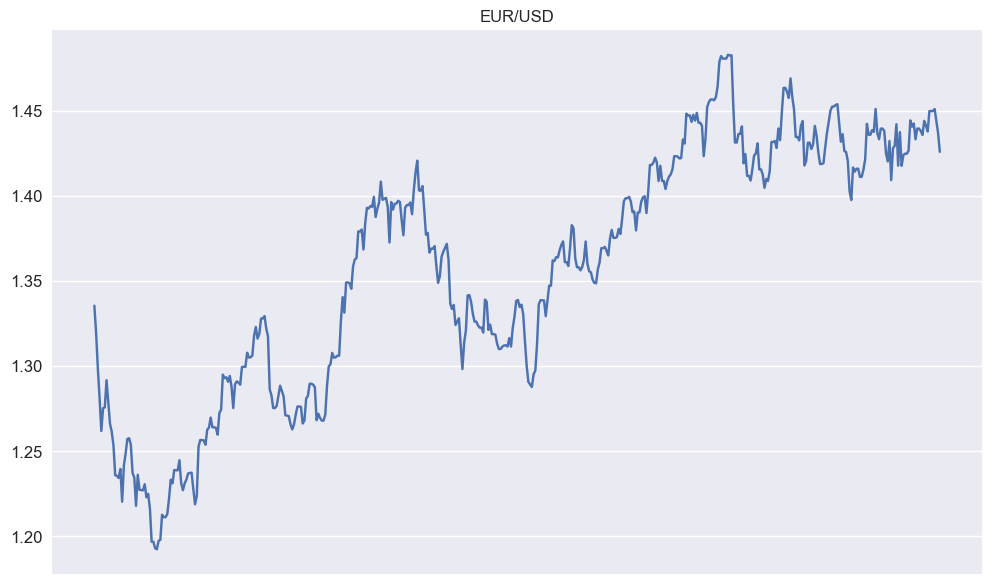

In [6]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Retracement/Support")
plt.legend(fontsize = 12)
plt.show()

__Retracement__: After having reached a Higher High in an Uptrend, the __price temporarily returns (retraces) part way back__ to the previous price level before the Uptrend continues. -> __Support at Retracement Level(s)__

In [7]:
high = data.loc["06-2010":"08-2010", "Close"].max()
high

1.32942

In [8]:
low = data.loc["06-2010":"08-2010", "Close"].min()
low

1.19236

In [9]:
fifty_percent = (low + high)/2
fifty_percent

1.26089

__Fibonacci Levels derived from Fibonacci numbers: 23.6%, 38.2%, 61.8%__

In [10]:
fibonacci1 = 0.236
fibonacci1

0.236

In [11]:
R1 = high - (high-low) * fibonacci1
R1

1.2970738400000001

In [12]:
fibonacci2 = 0.382
fibonacci2

0.382

In [13]:
R2 = high - (high-low) * fibonacci2
R2

1.27706308

In [14]:
fibonacci3 = 0.618
fibonacci3

0.618

In [15]:
R3 = high - (high-low) * fibonacci3
R3

1.2447169200000001

ConversionError: Failed to convert value(s) to axis units: array([Timestamp('2010-05-01 00:00:00'), Timestamp('2010-05-02 00:00:00'),
       Timestamp('2010-05-03 00:00:00'), Timestamp('2010-05-04 00:00:00'),
       Timestamp('2010-05-05 00:00:00'), Timestamp('2010-05-06 00:00:00'),
       Timestamp('2010-05-07 00:00:00'), Timestamp('2010-05-08 00:00:00'),
       Timestamp('2010-05-09 00:00:00'), Timestamp('2010-05-10 00:00:00'),
       Timestamp('2010-05-11 00:00:00'), Timestamp('2010-05-12 00:00:00'),
       Timestamp('2010-05-13 00:00:00'), Timestamp('2010-05-14 00:00:00'),
       Timestamp('2010-05-15 00:00:00'), Timestamp('2010-05-16 00:00:00'),
       Timestamp('2010-05-17 00:00:00'), Timestamp('2010-05-18 00:00:00'),
       Timestamp('2010-05-19 00:00:00'), Timestamp('2010-05-20 00:00:00'),
       Timestamp('2010-05-21 00:00:00'), Timestamp('2010-05-22 00:00:00'),
       Timestamp('2010-05-23 00:00:00'), Timestamp('2010-05-24 00:00:00'),
       Timestamp('2010-05-25 00:00:00'), Timestamp('2010-05-26 00:00:00'),
       Timestamp('2010-05-27 00:00:00'), Timestamp('2010-05-29 00:00:00'),
       Timestamp('2010-05-30 00:00:00'), Timestamp('2010-05-31 00:00:00'),
       Timestamp('2010-06-01 00:00:00'), Timestamp('2010-06-02 00:00:00'),
       Timestamp('2010-06-03 00:00:00'), Timestamp('2010-06-04 00:00:00'),
       Timestamp('2010-06-05 00:00:00'), Timestamp('2010-06-06 00:00:00'),
       Timestamp('2010-06-07 00:00:00'), Timestamp('2010-06-08 00:00:00'),
       Timestamp('2010-06-09 00:00:00'), Timestamp('2010-06-10 00:00:00'),
       Timestamp('2010-06-11 00:00:00'), Timestamp('2010-06-12 00:00:00'),
       Timestamp('2010-06-13 00:00:00'), Timestamp('2010-06-14 00:00:00'),
       Timestamp('2010-06-15 00:00:00'), Timestamp('2010-06-16 00:00:00'),
       Timestamp('2010-06-17 00:00:00'), Timestamp('2010-06-18 00:00:00'),
       Timestamp('2010-06-19 00:00:00'), Timestamp('2010-06-20 00:00:00'),
       Timestamp('2010-06-21 00:00:00'), Timestamp('2010-06-22 00:00:00'),
       Timestamp('2010-06-23 00:00:00'), Timestamp('2010-06-24 00:00:00'),
       Timestamp('2010-06-26 00:00:00'), Timestamp('2010-06-27 00:00:00'),
       Timestamp('2010-06-28 00:00:00'), Timestamp('2010-06-29 00:00:00'),
       Timestamp('2010-06-30 00:00:00'), Timestamp('2010-07-01 00:00:00'),
       Timestamp('2010-07-03 00:00:00'), Timestamp('2010-07-04 00:00:00'),
       Timestamp('2010-07-05 00:00:00'), Timestamp('2010-07-06 00:00:00'),
       Timestamp('2010-07-07 00:00:00'), Timestamp('2010-07-08 00:00:00'),
       Timestamp('2010-07-09 00:00:00'), Timestamp('2010-07-10 00:00:00'),
       Timestamp('2010-07-11 00:00:00'), Timestamp('2010-07-12 00:00:00'),
       Timestamp('2010-07-13 00:00:00'), Timestamp('2010-07-14 00:00:00'),
       Timestamp('2010-07-15 00:00:00'), Timestamp('2010-07-16 00:00:00'),
       Timestamp('2010-07-17 00:00:00'), Timestamp('2010-07-18 00:00:00'),
       Timestamp('2010-07-19 00:00:00'), Timestamp('2010-07-20 00:00:00'),
       Timestamp('2010-07-21 00:00:00'), Timestamp('2010-07-22 00:00:00'),
       Timestamp('2010-07-23 00:00:00'), Timestamp('2010-07-24 00:00:00'),
       Timestamp('2010-07-25 00:00:00'), Timestamp('2010-07-26 00:00:00'),
       Timestamp('2010-07-27 00:00:00'), Timestamp('2010-07-28 00:00:00'),
       Timestamp('2010-07-29 00:00:00'), Timestamp('2010-07-30 00:00:00'),
       Timestamp('2010-07-31 00:00:00'), Timestamp('2010-08-01 00:00:00'),
       Timestamp('2010-08-02 00:00:00'), Timestamp('2010-08-03 00:00:00'),
       Timestamp('2010-08-04 00:00:00'), Timestamp('2010-08-05 00:00:00'),
       Timestamp('2010-08-06 00:00:00'), Timestamp('2010-08-07 00:00:00'),
       Timestamp('2010-08-08 00:00:00'), Timestamp('2010-08-09 00:00:00'),
       Timestamp('2010-08-10 00:00:00'), Timestamp('2010-08-11 00:00:00'),
       Timestamp('2010-08-12 00:00:00'), Timestamp('2010-08-13 00:00:00'),
       Timestamp('2010-08-14 00:00:00'), Timestamp('2010-08-15 00:00:00'),
       Timestamp('2010-08-16 00:00:00'), Timestamp('2010-08-17 00:00:00'),
       Timestamp('2010-08-18 00:00:00'), Timestamp('2010-08-19 00:00:00'),
       Timestamp('2010-08-20 00:00:00'), Timestamp('2010-08-21 00:00:00'),
       Timestamp('2010-08-22 00:00:00'), Timestamp('2010-08-23 00:00:00'),
       Timestamp('2010-08-24 00:00:00'), Timestamp('2010-08-25 00:00:00'),
       Timestamp('2010-08-26 00:00:00'), Timestamp('2010-08-27 00:00:00'),
       Timestamp('2010-08-28 00:00:00'), Timestamp('2010-08-29 00:00:00'),
       Timestamp('2010-08-30 00:00:00'), Timestamp('2010-08-31 00:00:00'),
       Timestamp('2010-09-01 00:00:00'), Timestamp('2010-09-02 00:00:00'),
       Timestamp('2010-09-03 00:00:00'), Timestamp('2010-09-04 00:00:00'),
       Timestamp('2010-09-05 00:00:00'), Timestamp('2010-09-06 00:00:00'),
       Timestamp('2010-09-07 00:00:00'), Timestamp('2010-09-08 00:00:00'),
       Timestamp('2010-09-09 00:00:00'), Timestamp('2010-09-10 00:00:00'),
       Timestamp('2010-09-11 00:00:00'), Timestamp('2010-09-12 00:00:00'),
       Timestamp('2010-09-13 00:00:00'), Timestamp('2010-09-14 00:00:00'),
       Timestamp('2010-09-15 00:00:00'), Timestamp('2010-09-16 00:00:00'),
       Timestamp('2010-09-17 00:00:00'), Timestamp('2010-09-18 00:00:00'),
       Timestamp('2010-09-19 00:00:00'), Timestamp('2010-09-20 00:00:00'),
       Timestamp('2010-09-21 00:00:00'), Timestamp('2010-09-22 00:00:00'),
       Timestamp('2010-09-23 00:00:00'), Timestamp('2010-09-24 00:00:00'),
       Timestamp('2010-09-25 00:00:00'), Timestamp('2010-09-26 00:00:00'),
       Timestamp('2010-09-27 00:00:00'), Timestamp('2010-09-28 00:00:00'),
       Timestamp('2010-09-29 00:00:00'), Timestamp('2010-09-30 00:00:00'),
       Timestamp('2010-10-01 00:00:00'), Timestamp('2010-10-02 00:00:00'),
       Timestamp('2010-10-03 00:00:00'), Timestamp('2010-10-04 00:00:00'),
       Timestamp('2010-10-05 00:00:00'), Timestamp('2010-10-06 00:00:00'),
       Timestamp('2010-10-07 00:00:00'), Timestamp('2010-10-08 00:00:00'),
       Timestamp('2010-10-09 00:00:00'), Timestamp('2010-10-10 00:00:00'),
       Timestamp('2010-10-11 00:00:00'), Timestamp('2010-10-12 00:00:00'),
       Timestamp('2010-10-13 00:00:00'), Timestamp('2010-10-14 00:00:00'),
       Timestamp('2010-10-16 00:00:00'), Timestamp('2010-10-17 00:00:00'),
       Timestamp('2010-10-18 00:00:00'), Timestamp('2010-10-19 00:00:00'),
       Timestamp('2010-10-20 00:00:00'), Timestamp('2010-10-21 00:00:00'),
       Timestamp('2010-10-22 00:00:00'), Timestamp('2010-10-23 00:00:00'),
       Timestamp('2010-10-24 00:00:00'), Timestamp('2010-10-25 00:00:00'),
       Timestamp('2010-10-26 00:00:00'), Timestamp('2010-10-27 00:00:00'),
       Timestamp('2010-10-28 00:00:00'), Timestamp('2010-10-29 00:00:00'),
       Timestamp('2010-10-30 00:00:00'), Timestamp('2010-10-31 00:00:00'),
       Timestamp('2010-11-01 00:00:00'), Timestamp('2010-11-02 00:00:00'),
       Timestamp('2010-11-03 00:00:00'), Timestamp('2010-11-04 00:00:00'),
       Timestamp('2010-11-05 00:00:00'), Timestamp('2010-11-06 00:00:00'),
       Timestamp('2010-11-07 00:00:00'), Timestamp('2010-11-08 00:00:00'),
       Timestamp('2010-11-09 00:00:00'), Timestamp('2010-11-10 00:00:00'),
       Timestamp('2010-11-11 00:00:00'), Timestamp('2010-11-12 00:00:00'),
       Timestamp('2010-11-13 00:00:00'), Timestamp('2010-11-14 00:00:00'),
       Timestamp('2010-11-15 00:00:00'), Timestamp('2010-11-16 00:00:00'),
       Timestamp('2010-11-17 00:00:00'), Timestamp('2010-11-18 00:00:00'),
       Timestamp('2010-11-20 00:00:00'), Timestamp('2010-11-21 00:00:00'),
       Timestamp('2010-11-22 00:00:00'), Timestamp('2010-11-23 00:00:00'),
       Timestamp('2010-11-24 00:00:00'), Timestamp('2010-11-25 00:00:00'),
       Timestamp('2010-11-27 00:00:00'), Timestamp('2010-11-28 00:00:00'),
       Timestamp('2010-11-29 00:00:00'), Timestamp('2010-11-30 00:00:00'),
       Timestamp('2010-12-01 00:00:00'), Timestamp('2010-12-02 00:00:00'),
       Timestamp('2010-12-03 00:00:00'), Timestamp('2010-12-04 00:00:00'),
       Timestamp('2010-12-05 00:00:00'), Timestamp('2010-12-06 00:00:00'),
       Timestamp('2010-12-07 00:00:00'), Timestamp('2010-12-08 00:00:00'),
       Timestamp('2010-12-09 00:00:00'), Timestamp('2010-12-10 00:00:00'),
       Timestamp('2010-12-11 00:00:00'), Timestamp('2010-12-12 00:00:00'),
       Timestamp('2010-12-13 00:00:00'), Timestamp('2010-12-14 00:00:00'),
       Timestamp('2010-12-15 00:00:00'), Timestamp('2010-12-16 00:00:00'),
       Timestamp('2010-12-17 00:00:00'), Timestamp('2010-12-18 00:00:00'),
       Timestamp('2010-12-19 00:00:00'), Timestamp('2010-12-20 00:00:00'),
       Timestamp('2010-12-21 00:00:00'), Timestamp('2010-12-22 00:00:00'),
       Timestamp('2010-12-23 00:00:00'), Timestamp('2010-12-24 00:00:00'),
       Timestamp('2010-12-25 00:00:00'), Timestamp('2010-12-26 00:00:00'),
       Timestamp('2010-12-27 00:00:00'), Timestamp('2010-12-28 00:00:00'),
       Timestamp('2010-12-29 00:00:00'), Timestamp('2010-12-30 00:00:00'),
       Timestamp('2010-12-31 00:00:00'), Timestamp('2011-01-01 00:00:00'),
       Timestamp('2011-01-02 00:00:00'), Timestamp('2011-01-03 00:00:00'),
       Timestamp('2011-01-04 00:00:00'), Timestamp('2011-01-05 00:00:00'),
       Timestamp('2011-01-06 00:00:00'), Timestamp('2011-01-08 00:00:00'),
       Timestamp('2011-01-09 00:00:00'), Timestamp('2011-01-10 00:00:00'),
       Timestamp('2011-01-11 00:00:00'), Timestamp('2011-01-12 00:00:00'),
       Timestamp('2011-01-13 00:00:00'), Timestamp('2011-01-14 00:00:00'),
       Timestamp('2011-01-15 00:00:00'), Timestamp('2011-01-16 00:00:00'),
       Timestamp('2011-01-17 00:00:00'), Timestamp('2011-01-18 00:00:00'),
       Timestamp('2011-01-19 00:00:00'), Timestamp('2011-01-20 00:00:00'),
       Timestamp('2011-01-21 00:00:00'), Timestamp('2011-01-22 00:00:00'),
       Timestamp('2011-01-23 00:00:00'), Timestamp('2011-01-24 00:00:00'),
       Timestamp('2011-01-25 00:00:00'), Timestamp('2011-01-26 00:00:00'),
       Timestamp('2011-01-27 00:00:00'), Timestamp('2011-01-28 00:00:00'),
       Timestamp('2011-01-29 00:00:00'), Timestamp('2011-01-30 00:00:00'),
       Timestamp('2011-01-31 00:00:00'), Timestamp('2011-02-01 00:00:00'),
       Timestamp('2011-02-02 00:00:00'), Timestamp('2011-02-03 00:00:00'),
       Timestamp('2011-02-04 00:00:00'), Timestamp('2011-02-05 00:00:00'),
       Timestamp('2011-02-06 00:00:00'), Timestamp('2011-02-07 00:00:00'),
       Timestamp('2011-02-08 00:00:00'), Timestamp('2011-02-09 00:00:00'),
       Timestamp('2011-02-10 00:00:00'), Timestamp('2011-02-11 00:00:00'),
       Timestamp('2011-02-12 00:00:00'), Timestamp('2011-02-13 00:00:00'),
       Timestamp('2011-02-14 00:00:00'), Timestamp('2011-02-15 00:00:00'),
       Timestamp('2011-02-16 00:00:00'), Timestamp('2011-02-17 00:00:00'),
       Timestamp('2011-02-18 00:00:00'), Timestamp('2011-02-19 00:00:00'),
       Timestamp('2011-02-20 00:00:00'), Timestamp('2011-02-21 00:00:00'),
       Timestamp('2011-02-22 00:00:00'), Timestamp('2011-02-23 00:00:00'),
       Timestamp('2011-02-24 00:00:00'), Timestamp('2011-02-25 00:00:00'),
       Timestamp('2011-02-26 00:00:00'), Timestamp('2011-02-27 00:00:00'),
       Timestamp('2011-02-28 00:00:00'), Timestamp('2011-03-01 00:00:00'),
       Timestamp('2011-03-02 00:00:00'), Timestamp('2011-03-03 00:00:00'),
       Timestamp('2011-03-04 00:00:00'), Timestamp('2011-03-05 00:00:00'),
       Timestamp('2011-03-06 00:00:00'), Timestamp('2011-03-07 00:00:00'),
       Timestamp('2011-03-08 00:00:00'), Timestamp('2011-03-09 00:00:00'),
       Timestamp('2011-03-10 00:00:00'), Timestamp('2011-03-11 00:00:00'),
       Timestamp('2011-03-12 00:00:00'), Timestamp('2011-03-13 00:00:00'),
       Timestamp('2011-03-14 00:00:00'), Timestamp('2011-03-15 00:00:00'),
       Timestamp('2011-03-16 00:00:00'), Timestamp('2011-03-17 00:00:00'),
       Timestamp('2011-03-18 00:00:00'), Timestamp('2011-03-19 00:00:00'),
       Timestamp('2011-03-20 00:00:00'), Timestamp('2011-03-21 00:00:00'),
       Timestamp('2011-03-22 00:00:00'), Timestamp('2011-03-23 00:00:00'),
       Timestamp('2011-03-24 00:00:00'), Timestamp('2011-03-25 00:00:00'),
       Timestamp('2011-03-26 00:00:00'), Timestamp('2011-03-27 00:00:00'),
       Timestamp('2011-03-28 00:00:00'), Timestamp('2011-03-29 00:00:00'),
       Timestamp('2011-03-30 00:00:00'), Timestamp('2011-03-31 00:00:00'),
       Timestamp('2011-04-01 00:00:00'), Timestamp('2011-04-02 00:00:00'),
       Timestamp('2011-04-03 00:00:00'), Timestamp('2011-04-04 00:00:00'),
       Timestamp('2011-04-05 00:00:00'), Timestamp('2011-04-06 00:00:00'),
       Timestamp('2011-04-07 00:00:00'), Timestamp('2011-04-08 00:00:00'),
       Timestamp('2011-04-09 00:00:00'), Timestamp('2011-04-10 00:00:00'),
       Timestamp('2011-04-11 00:00:00'), Timestamp('2011-04-12 00:00:00'),
       Timestamp('2011-04-13 00:00:00'), Timestamp('2011-04-14 00:00:00'),
       Timestamp('2011-04-15 00:00:00'), Timestamp('2011-04-16 00:00:00'),
       Timestamp('2011-04-17 00:00:00'), Timestamp('2011-04-18 00:00:00'),
       Timestamp('2011-04-19 00:00:00'), Timestamp('2011-04-20 00:00:00'),
       Timestamp('2011-04-21 00:00:00'), Timestamp('2011-04-22 00:00:00'),
       Timestamp('2011-04-23 00:00:00'), Timestamp('2011-04-24 00:00:00'),
       Timestamp('2011-04-25 00:00:00'), Timestamp('2011-04-26 00:00:00'),
       Timestamp('2011-04-27 00:00:00'), Timestamp('2011-04-28 00:00:00'),
       Timestamp('2011-04-29 00:00:00'), Timestamp('2011-04-30 00:00:00'),
       Timestamp('2011-05-01 00:00:00'), Timestamp('2011-05-02 00:00:00'),
       Timestamp('2011-05-03 00:00:00'), Timestamp('2011-05-04 00:00:00'),
       Timestamp('2011-05-05 00:00:00'), Timestamp('2011-05-06 00:00:00'),
       Timestamp('2011-05-07 00:00:00'), Timestamp('2011-05-08 00:00:00'),
       Timestamp('2011-05-09 00:00:00'), Timestamp('2011-05-10 00:00:00'),
       Timestamp('2011-05-11 00:00:00'), Timestamp('2011-05-12 00:00:00'),
       Timestamp('2011-05-13 00:00:00'), Timestamp('2011-05-14 00:00:00'),
       Timestamp('2011-05-15 00:00:00'), Timestamp('2011-05-16 00:00:00'),
       Timestamp('2011-05-17 00:00:00'), Timestamp('2011-05-18 00:00:00'),
       Timestamp('2011-05-19 00:00:00'), Timestamp('2011-05-20 00:00:00'),
       Timestamp('2011-05-21 00:00:00'), Timestamp('2011-05-22 00:00:00'),
       Timestamp('2011-05-23 00:00:00'), Timestamp('2011-05-24 00:00:00'),
       Timestamp('2011-05-25 00:00:00'), Timestamp('2011-05-26 00:00:00'),
       Timestamp('2011-05-27 00:00:00'), Timestamp('2011-05-28 00:00:00'),
       Timestamp('2011-05-29 00:00:00'), Timestamp('2011-05-30 00:00:00'),
       Timestamp('2011-05-31 00:00:00'), Timestamp('2011-06-01 00:00:00'),
       Timestamp('2011-06-02 00:00:00'), Timestamp('2011-06-03 00:00:00'),
       Timestamp('2011-06-04 00:00:00'), Timestamp('2011-06-05 00:00:00'),
       Timestamp('2011-06-06 00:00:00'), Timestamp('2011-06-07 00:00:00'),
       Timestamp('2011-06-08 00:00:00'), Timestamp('2011-06-09 00:00:00'),
       Timestamp('2011-06-10 00:00:00'), Timestamp('2011-06-11 00:00:00'),
       Timestamp('2011-06-12 00:00:00'), Timestamp('2011-06-13 00:00:00'),
       Timestamp('2011-06-14 00:00:00'), Timestamp('2011-06-15 00:00:00'),
       Timestamp('2011-06-16 00:00:00'), Timestamp('2011-06-17 00:00:00'),
       Timestamp('2011-06-18 00:00:00'), Timestamp('2011-06-19 00:00:00'),
       Timestamp('2011-06-20 00:00:00'), Timestamp('2011-06-21 00:00:00'),
       Timestamp('2011-06-22 00:00:00'), Timestamp('2011-06-23 00:00:00'),
       Timestamp('2011-06-24 00:00:00'), Timestamp('2011-06-25 00:00:00'),
       Timestamp('2011-06-26 00:00:00'), Timestamp('2011-06-27 00:00:00'),
       Timestamp('2011-06-28 00:00:00'), Timestamp('2011-06-29 00:00:00'),
       Timestamp('2011-06-30 00:00:00'), Timestamp('2011-07-01 00:00:00'),
       Timestamp('2011-07-02 00:00:00'), Timestamp('2011-07-03 00:00:00'),
       Timestamp('2011-07-04 00:00:00'), Timestamp('2011-07-05 00:00:00'),
       Timestamp('2011-07-06 00:00:00'), Timestamp('2011-07-07 00:00:00'),
       Timestamp('2011-07-08 00:00:00'), Timestamp('2011-07-09 00:00:00'),
       Timestamp('2011-07-10 00:00:00'), Timestamp('2011-07-11 00:00:00'),
       Timestamp('2011-07-12 00:00:00'), Timestamp('2011-07-13 00:00:00'),
       Timestamp('2011-07-14 00:00:00'), Timestamp('2011-07-15 00:00:00'),
       Timestamp('2011-07-16 00:00:00'), Timestamp('2011-07-17 00:00:00'),
       Timestamp('2011-07-18 00:00:00'), Timestamp('2011-07-19 00:00:00'),
       Timestamp('2011-07-20 00:00:00'), Timestamp('2011-07-21 00:00:00'),
       Timestamp('2011-07-22 00:00:00'), Timestamp('2011-07-23 00:00:00'),
       Timestamp('2011-07-24 00:00:00'), Timestamp('2011-07-25 00:00:00'),
       Timestamp('2011-07-26 00:00:00'), Timestamp('2011-07-27 00:00:00'),
       Timestamp('2011-07-28 00:00:00'), Timestamp('2011-07-29 00:00:00'),
       Timestamp('2011-07-30 00:00:00'), Timestamp('2011-07-31 00:00:00'),
       Timestamp('2011-08-01 00:00:00'), Timestamp('2011-08-02 00:00:00'),
       Timestamp('2011-08-03 00:00:00'), Timestamp('2011-08-04 00:00:00'),
       Timestamp('2011-08-05 00:00:00'), Timestamp('2011-08-06 00:00:00'),
       Timestamp('2011-08-07 00:00:00'), Timestamp('2011-08-08 00:00:00'),
       Timestamp('2011-08-09 00:00:00'), Timestamp('2011-08-10 00:00:00'),
       Timestamp('2011-08-11 00:00:00'), Timestamp('2011-08-12 00:00:00'),
       Timestamp('2011-08-13 00:00:00'), Timestamp('2011-08-14 00:00:00'),
       Timestamp('2011-08-15 00:00:00'), Timestamp('2011-08-16 00:00:00'),
       Timestamp('2011-08-17 00:00:00'), Timestamp('2011-08-18 00:00:00'),
       Timestamp('2011-08-19 00:00:00'), Timestamp('2011-08-20 00:00:00'),
       Timestamp('2011-08-21 00:00:00'), Timestamp('2011-08-22 00:00:00'),
       Timestamp('2011-08-23 00:00:00'), Timestamp('2011-08-24 00:00:00'),
       Timestamp('2011-08-25 00:00:00'), Timestamp('2011-08-26 00:00:00'),
       Timestamp('2011-08-27 00:00:00'), Timestamp('2011-08-28 00:00:00'),
       Timestamp('2011-08-29 00:00:00'), Timestamp('2011-08-30 00:00:00'),
       Timestamp('2011-08-31 00:00:00')], dtype=object)

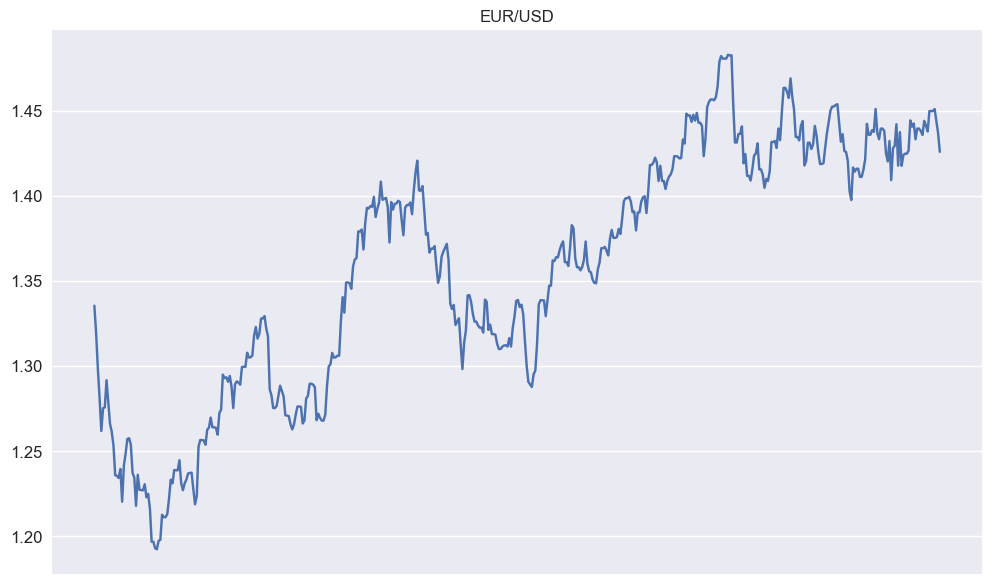

In [16]:
data.loc["05-2010":"08-2011", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.26, xmin = "06-2010", xmax = "06-2011", color = "green", label = "Actual Retracement/Support")
plt.hlines(y = R1, xmin = "06-2010", xmax = "06-2011", color = "red", label = "R1 (23.6%)")
plt.hlines(y = R2, xmin = "06-2010", xmax = "06-2011", color = "grey", label = "R2 (38.2%)")
plt.hlines(y = R3, xmin = "06-2010", xmax = "06-2011", color = "purple", label = "R3 (61.8%)")
plt.legend(fontsize = 12)
plt.show()

__Retracement Level Breakout__: If the price breaks through Retracement Level(s), this could indicate a Trend Reversal (Downtrend)

## A first Intuition on Fibonacci Retracement (Downtrend)

__Downtrend: Lower Lows and Lower Highs__

In [ ]:
data

In [ ]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.35, xmin = "10-2011", xmax = "12-2012", color = "red", label = "Retracement/Resistance")
plt.legend(fontsize = 12)
plt.show()

__Retracement__: After having reached a Lower Low in an Downtrend, the __price temporarily returns (retraces) part way back__ to the previous price level before the Downtrend continues. -> __Resistance at Retracement Level(s)__

In [ ]:
low = data.loc["10-2011":"03-2012", "Close"].min()
low

In [ ]:
high = data.loc["10-2011":"03-2012", "Close"].max()
high

In [ ]:
print(fibonacci1, fibonacci2, fibonacci3)

In [ ]:
R1 = high - (high-low) * (1-fibonacci1)
R1

In [ ]:
R2 = high - (high-low) * (1-fibonacci2)
R2

In [ ]:
R3 = high - (high-low) * (1-fibonacci3)
R3

In [ ]:
data.loc["10-2011":"12-2012", "Close"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.hlines(y = 1.35, xmin = "10-2011", xmax = "12-2012", color = "red", label = "Actual Retracement/Resistance")
plt.hlines(y = R1, xmin = "10-2011", xmax = "12-2012", color = "green", label = "R1 (23.6%)")
plt.hlines(y = R2, xmin = "10-2011", xmax = "12-2012", color = "grey", label = "R2 (38.2%)")
plt.hlines(y = R3, xmin = "10-2011", xmax = "12-2012", color = "purple", label = "R3 (61.8%)")
plt.legend(fontsize = 12)
plt.show()

__Retracement Level Breakout__: If the price breaks through Retracement Level(s), this could indicate a Trend Reversal (Uptrend)

## Identifying Local Highs

In [ ]:
from scipy.signal import argrelextrema

In [ ]:
data

In [ ]:
hh = data.High.copy()

In [ ]:
hh

In [ ]:
order = 70 # approx. 3 month

In [ ]:
local_max = argrelextrema(hh.values, np.greater_equal, order = order)

In [ ]:
local_max

In [ ]:
data.index[local_max]

In [ ]:
data.High.values[local_max]

In [ ]:
data.Close.plot(figsize = (20, 8))
plt.vlines(x = data.index[local_max], ymin = data.Low.min(), ymax = data.High.max(), color = "g")
plt.show()

## Identifying Local Lows

In [ ]:
data

In [ ]:
ll = data.Low.copy()

In [ ]:
order

In [ ]:
local_min = argrelextrema(ll.values, np.less_equal, order = order)

In [ ]:
local_min

In [ ]:
data.index[local_min]

In [ ]:
data.Low.values[local_min]

In [ ]:
data.Close.plot(figsize = (20, 8))
plt.vlines(x = data.index[local_max], ymin = data.Low.min(), ymax = data.High.max(), color = "g", label = "Local Highs")
plt.vlines(x = data.index[local_min], ymin = data.Low.min(), ymax = data.High.max(), color = "r", label = "Local Lows")
plt.title("Local Highs and Lows for Fibonacci Retracement", fontsize = 15)
plt.legend(fontsize = 13)
plt.show()

## High and Lows - an iterative approach

In [ ]:
data

In [ ]:
order

__Highs__

In [ ]:
data["hh"] = np.nan
data["hh_date"] = np.nan

In [ ]:
data

In [ ]:
for bar in range(len(data)): # iterating over the bars
    date = data.index[bar] # determine the current bar´s date
    hh = data.iloc[:bar+1].High # get the high column until current bar
    
    # determine all local highs until current bar
    local_max = argrelextrema(hh.values, np.greater_equal, order = order) 
    
    # determine the most recent local high (price) and add to "hh" column
    data.loc[date, "hh"] = data.High.values[local_max][-1] 
    
    # determine the most recent local high (date) and add to "hh_date" column
    data.loc[date, "hh_date"] = data.index[local_max][-1]  

In [ ]:
data

__Lows__

In [ ]:
data["ll"] = np.nan
data["ll_date"] = np.nan

In [ ]:
for bar in range(len(data)): # iterating over the bars
    date = data.index[bar] # determine the current bar´s date
    ll = data.iloc[:bar+1].Low # get the high column until current bar
    
    # determine all local lows until current bar
    local_min = argrelextrema(ll.values, np.less_equal, order = order)
    
    # determine the most recent local low (price) and add to "ll" column
    data.loc[date, "ll"] = data.Low.values[local_min][-1]
    
    # determine the most recent local low (date) and add to "ll_date" column
    data.loc[date, "ll_date"] = data.index[local_min][-1]

In [ ]:
data

In [ ]:
data.info()

## Identifying Trends (Uptrend / Downtrend)

In [ ]:
data.loc["2010":"2011", ["Close", "hh", "ll"]].plot(figsize = (12, 8), title = "EUR/USD",
                                                    fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

__Downtrend__: Most recent lower low is more recent than the most recent higher high <br>
__Uptrend__: Most recent higher high is more recent than the most recent lower low

In [ ]:
data["Trend"] = np.where(data.hh_date > data.ll_date, 1, -1)

In [ ]:
data

In [ ]:
data.loc["2010":"2011", ["Close", "hh", "ll", "Trend"]].plot(figsize = (12, 8), title = "EUR/USD",
                                                             fontsize = 12, secondary_y = "Trend")
plt.legend(fontsize = 12)
plt.show()

In [ ]:
data["Trend"] = np.where(data.hh_date > data.ll_date, "Up", "Down")

In [ ]:
data

In [ ]:
data.drop(columns = ["hh_date", "ll_date"], inplace = True)

In [ ]:
data

In [ ]:
data.Trend.value_counts()

## Adding Fibonacci Retracement Levels

In [ ]:
data

__Fibonacci Levels derived from Fibonacci numbers: 23.6%, 38.2%, (61.8%)__

In [ ]:
data["R23.6"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.236, data.hh - (data.hh-data.ll) * (1-0.236))

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data["R38.2"] = np.where(data.Trend == "Up", data.hh - (data.hh-data.ll) * 0.382, data.hh - (data.hh-data.ll) * (1-0.382))

In [ ]:
data.info()

In [ ]:
data

## A Fibonacci Retracement (23.6%) Breakout Strategy

In [ ]:
data

__Go Neutral when reaching new Highs/lows (e.g. when Trend reverses)__

In [ ]:
data["position"] = np.where((data.hh != data.hh.shift()) | (data.ll != data.ll.shift()), 0, np.nan)

In [ ]:
data.position.value_counts()

### Downtrend Decisions

__Go Long when Price breaks R23.6__

In [ ]:
data["position"] = np.where((data.Trend == "Down") & (data.Close.shift() < data["R23.6"].shift()) & (data.Close > data["R23.6"]), 1, data.position)

__Go Neutral when Price reaches/breaks R38.2__ (Take Profit)

In [ ]:
data["position"] = np.where((data.Trend == "Down") & (data.Close.shift() < data["R38.2"].shift()) & (data.Close >= data["R38.2"]), 0, data.position)

__Go Neutral when Prices reaches/breaks R0__ (Stop Loss)

In [ ]:
data["position"] = np.where((data.Trend == "Down") & (data.Close.shift() > data.ll.shift()) & (data.Close <= data.ll), 0, data.position)

In [ ]:
data.position.value_counts()

### Uptrend Decisions

__Go Short when Price breaks R23.6__

In [ ]:
data["position"] = np.where((data.Trend == "Up") & (data.Close.shift() > data["R23.6"].shift()) & (data.Close < data["R23.6"]), -1, data.position)

In [ ]:
data.position.value_counts()

__Go Neutral when Price reaches/breaks R38.2__ (Take profit)

In [ ]:
data["position"] = np.where((data.Trend == "Up") & (data.Close.shift() > data["R38.2"].shift()) & (data.Close <= data["R38.2"]), 0, data.position)

__Go Neutral when Prices reaches/breaks R0__ (Stop Loss)

In [ ]:
data["position"] = np.where((data.Trend == "Up") & (data.Close.shift() < data.hh.shift()) & (data.Close >= data.hh), 0, data.position)

__Go Neutral when reaching new Highs/lows (e.g. when Trend reverses)__

In [ ]:
data["position"] = np.where((data.hh != data.hh.shift()) | (data.ll != data.ll.shift()), 0, data.position)

In [ ]:
data["position"] = data.position.ffill()

In [ ]:
data.position.value_counts()

In [ ]:
data

In [ ]:
data.loc[:, ["Close", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.legend(fontsize = 12)
plt.show()

## Vectorized Strategy Backtesting

In [ ]:
data

In [ ]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
ptc = 0.00007

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2018", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()